# Multiple Linear Regression - Cumulative Lab

## Introduction

In this cumulative lab you'll perform an end-to-end analysis of a dataset using multiple linear regression.

## Objectives

You will be able to:

* Prepare data for regression analysis using pandas
* Build multiple linear regression models using StatsModels
* Measure regression model performance
* Interpret multiple linear regression coefficients

## Your Task: Develop a Model of Diamond Prices

![tweezers holding a diamond](https://curriculum-content.s3.amazonaws.com/data-science/images/diamond.jpg)

Photo by <a href="https://unsplash.com/@tahliaclaire?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Tahlia Doyle</a> on <a href="https://unsplash.com/s/photos/diamonds?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

### Business Understanding

You've been asked to perform an analysis to see how various factors impact the price of diamonds. There are various [guides online](https://www.diamonds.pro/education/diamond-prices/) that claim to tell consumers how to avoid getting "ripped off", but you've been asked to dig into the data to see whether these claims ring true.

### Data Understanding

We have downloaded a diamonds dataset from [Kaggle](https://www.kaggle.com/datasets/shivam2503/diamonds), which came with this description:

* **price** price in US dollars (\$326--\$18,823)
* **carat** weight of the diamond (0.2--5.01)
* **cut** quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* **color** diamond colour, from J (worst) to D (best)
* **clarity** a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* **x** length in mm (0--10.74)
* **y** width in mm (0--58.9)
* **z** depth in mm (0--31.8)
* **depth** total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
* **table** width of top of diamond relative to widest point (43--95)

### Requirements

#### 1. Load the Data Using Pandas

Practice once again with loading CSV data into a `pandas` dataframe.

#### 2. Build a Baseline Simple Linear Regression Model

Identify the feature that is most correlated with `price` and build a StatsModels linear regression model using just that feature.

#### 3. Evaluate and Interpret Baseline Model Results

Explain the overall performance as well as parameter coefficients for the baseline simple linear regression model.

#### 4. Prepare a Categorical Feature for Multiple Regression Modeling

Identify a promising categorical feature and use `pd.get_dummies()` to prepare it for modeling.

#### 5. Build a Multiple Linear Regression Model

Using the data from Step 4, create a second StatsModels linear regression model using one numeric feature and one one-hot encoded categorical feature.

#### 6. Evaluate and Interpret Multiple Linear Regression Model Results

Explain the performance of the new model in comparison with the baseline, and interpret the new parameter coefficients.

## 1. Load the Data Using Pandas

Import `pandas` (with the standard alias `pd`), and load the data from the file `diamonds.csv` into a DataFrame called `diamonds`.

Be sure to specify `index_col=0` to avoid creating an "Unnamed: 0" column.

In [4]:
# Your code here
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
diamonds = pd.read_csv("diamonds.csv", index_col=0)

The following code checks that you loaded the data correctly:

In [5]:
# Run this cell without changes

# diamonds should be a dataframe
assert type(diamonds) == pd.DataFrame

# Check that there are the correct number of rows
assert diamonds.shape[0] == 53940

# Check that there are the correct number of columns
# (if this crashes, make sure you specified `index_col=0`)
assert diamonds.shape[1] == 10

Inspect the distributions of the numeric features:

In [6]:
# Run this cell without changes
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


And inspect the value counts for the categorical features:

In [7]:
# Run this cell without changes
categoricals = diamonds.select_dtypes("object")

for col in categoricals:
    print(diamonds[col].value_counts(), "\n")

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64 

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64 

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64 



## 2. Build a Baseline Simple Linear Regression Model

### Identifying a Highly Correlated Predictor

The target variable is `price`. Look at the correlation coefficients for all of the predictor variables to find the one with the highest correlation with `price`.

In [10]:
# Your code here - look at correlations
# Select only the numeric columns
numeric_df = diamonds.select_dtypes(include=['number'])

# Calculate the correlation matrix for the numeric variables
correlation_matrix = numeric_df.corr()

# Display the correlation with the target variable 'SalePrice'
correlation_with_price = correlation_matrix['price'].sort_values(ascending=False)

# Show the most correlated variables with SalePrice
print(correlation_with_price)

price    1.000000
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth   -0.010647
Name: price, dtype: float64


Identify the name of the predictor column with the strongest correlation below.

In [13]:
# Replace None with appropriate code
most_correlated = correlation_matrix['price'].drop('price').abs().idxmax()
print(most_correlated)

carat


The following code checks that you specified a column correctly:

In [14]:
# Run this cell without changes

# most_correlated should be a string
assert type(most_correlated) == str

# most_correlated should be one of the columns other than price
assert most_correlated in diamonds.drop("price", axis=1).columns

### Plotting the Predictor vs. Price

We'll also create a scatter plot of that variable vs. `price`:

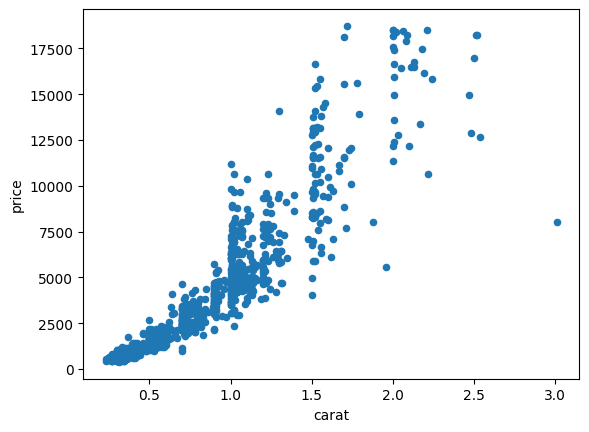

In [15]:
# Run this cell without changes

# Plot a sample of 1000 data points, most_correlated vs. price
diamonds.sample(1000, random_state=1).plot.scatter(x=most_correlated, y="price");

### Setting Up Variables for Regression

Declare `y` and `X_baseline` variables, where `y` is a Series containing `price` data and `X_baseline` is a DataFrame containing the column with the strongest correlation.

In [18]:
# Replace None with appropriate code
y = diamonds['price']
X_baseline = diamonds[['carat']]

The following code checks that you created valid `y` and `X_baseline` variables:

In [19]:
# Run this code without changes

# y should be a series
assert type(y) == pd.Series

# y should contain about 54k rows
assert y.shape == (53940,)

# X_baseline should be a DataFrame
assert type(X_baseline) == pd.DataFrame

# X_baseline should contain the same number of rows as y
assert X_baseline.shape[0] == y.shape[0]

# X_baseline should have 1 column
assert X_baseline.shape[1] == 1

### Creating and Fitting Simple Linear Regression

The following code uses your variables to build and fit a simple linear regression.

In [21]:
# Run this cell without changes
import statsmodels.api as sm

baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

## 3. Evaluate and Interpret Baseline Model Results

Write any necessary code to evaluate the model performance overall and interpret its coefficients.

In [23]:
# Your code here
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_baseline, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the performance metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Print out the evaluation metrics
print(f"R-squared: {r2}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

# Get the coefficient (slope) of the carat variable
coefficient = model.coef_[0]
print(f"Coefficient for carat: {coefficient}")

# Get the intercept
intercept = model.intercept_
print(f"Intercept: {intercept}")


R-squared: 0.8489390686155807
Mean Absolute Error (MAE): 1009.5047420601015
Mean Squared Error (MSE): 2401388.6544790952
Coefficient for carat: 7768.910490360937
Intercept: -2261.9117456493095


Then summarize your findings below:

In [ ]:
# Your written answer here

<details>
    <summary style="cursor: pointer"><b>Solution (click to expand)</b></summary>

`carat` was the attribute most strongly correlated with `price`, therefore our model is describing this relationship.

Overall this model is statistically significant and explains about 85% of the variance in price. In a typical prediction, the model is off by about &dollar;1k.

* The intercept is at about -\\$2.3k. This means that a zero-carat diamond would sell for -\\$2.3k.
* The coefficient for `carat` is about \\$7.8k. This means for each additional carat, the diamond costs about \\$7.8k more.

</details>    

## 4. Prepare a Categorical Feature for Multiple Regression Modeling

Now let's go beyond our simple linear regression and add a categorical feature.

### Identifying a Promising Predictor

Below we create bar graphs for the categories present in each categorical feature:

int64
cut: ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color: ['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity: ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
cut: ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color: ['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity: ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']
cut: ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color: ['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity: ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


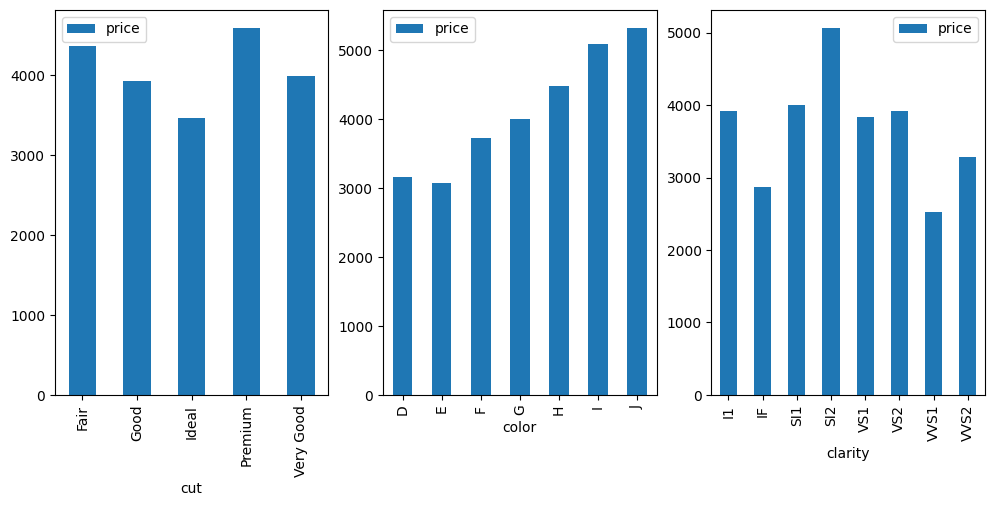

In [36]:
print(diamonds['price'].dtype)
categorical_features = diamonds.select_dtypes("object").columns
fig, axes = plt.subplots(ncols=len(categorical_features), figsize=(12, 5))

for index, feature in enumerate(categorical_features):
    diamonds.groupby(feature).mean(numeric_only=True).plot.bar(y="price", ax=axes[index])
    for feature in categorical_features:
        print(f"{feature}: {diamonds[feature].unique()}")


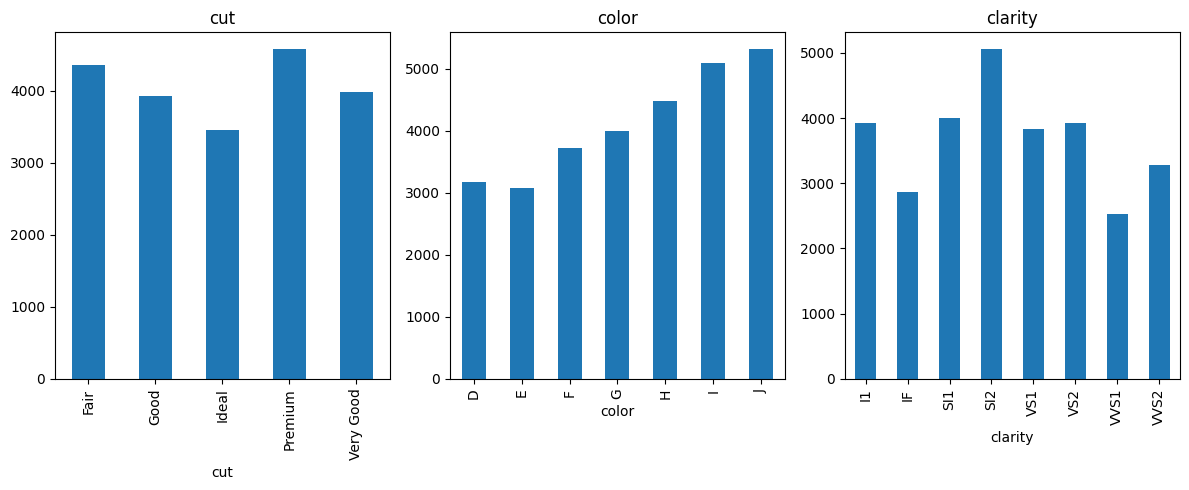

In [38]:
# Run this code without changes

categorical_features = diamonds.select_dtypes("object").columns
fig, axes = plt.subplots(ncols=len(categorical_features), figsize=(12, 5))

for index, feature in enumerate(categorical_features):
    # Compute mean for only numeric columns
    diamonds.groupby(feature)[["price"]].mean().plot.bar(ax=axes[index], legend=False)
    axes[index].set_title(feature)

plt.tight_layout()
plt.show()

Identify the name of the categorical predictor column you want to use in your model below. The choice here is more open-ended than choosing the numeric predictor above -- choose something that will be interpretable in a final model, and where the different categories seem to have an impact on the price.

In [39]:
# Replace None with appropriate code
cat_col = "cut"

The following code checks that you specified a column correctly:

In [40]:
# Run this cell without changes

# cat_col should be a string
assert type(cat_col) == str

# cat_col should be one of the categorical columns
assert cat_col in diamonds.select_dtypes("object").columns

### Setting Up Variables for Regression

The code below creates a variable `X_iterated`: a DataFrame containing the column with the strongest correlation **and** your selected categorical feature.

In [41]:
# Run this cell without changes
X_iterated = diamonds[[most_correlated, cat_col]]
X_iterated

,carat,cut
1,0.23,Ideal
2,0.21,Premium
3,0.23,Good
4,0.29,Premium
5,0.31,Good
...,...,...
53936,0.72,Ideal
53937,0.72,Good
53938,0.70,Very Good
53939,0.86,Premium


### Preprocessing Categorical Variable

If we tried to pass `X_iterated` as-is into `sm.OLS`, we would get an error. We need to use `pd.get_dummies` to create dummy variables for `cat_col`.

**DO NOT** use `drop_first=True`, so that you can intentionally set a meaningful reference category instead.

In [53]:
# Replace None with appropriate code
# Convert the boolean columns to integers (1 for True, 0 for False)
X_iterated = X_iterated.astype(int)

# Now check the data types again
print(X_iterated.dtypes)

# Define the target variable
y = diamonds['price']

# Add a constant to the predictor variables
X_iterated = sm.add_constant(X_iterated)

# Fit the OLS model
model = sm.OLS(y, X_iterated)
results = model.fit()

# View the summary of the model
print(results.summary())


const            int64
carat            int64
cut_Good         int64
cut_Ideal        int64
cut_Premium      int64
cut_Very Good    int64
dtype: object
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                 2.919e+04
Date:                Wed, 05 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:04:15   Log-Likelihood:            -4.8844e+05
No. Observations:               53940   AIC:                         9.769e+05
Df Residuals:                   53934   BIC:                         9.770e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t| 

The following code checks that you have the right number of columns:

In [54]:
# Run this cell without changes

# X_iterated should be a dataframe
assert type(X_iterated) == pd.DataFrame

# You should have the number of unique values in one of the
# categorical columns + 1 (representing the numeric predictor)
valid_col_nums = diamonds.select_dtypes("object").nunique() + 1

# Check that there are the correct number of columns
# (if this crashes, make sure you did not use `drop_first=True`)
assert X_iterated.shape[1] in valid_col_nums.values

Now, applying your domain understanding, **choose a column to drop and drop it**. This category should make sense as a "baseline" or "reference". For the "cut_Very Good" column that was generated when `pd.get_dummies` was used, we need to remove the space in the column name.

In [55]:
# Your code here

# Remove space from "cut_Very Good" column name
X_iterated.columns = X_iterated.columns.str.replace(' ', '')

# Drop the reference category column ('cut_Good')
X_iterated = X_iterated.drop('cut_Good', axis=1)

X_iterated.columns


Index(['const', 'carat', 'cut_Ideal', 'cut_Premium', 'cut_VeryGood'], dtype='object')

We now need to change the boolean values for the four "cut" column to 1s and 0s in order for the regression to run.

In [56]:
# Your code here

# Convert the boolean values to 1s and 0s
cut_columns = ['cut_Ideal', 'cut_Premium', 'cut_VeryGood']  # Exclude cut_Good since it's dropped

# Apply the conversion to integers 
X_iterated[cut_columns] = X_iterated[cut_columns].astype(int)

# Result
X_iterated[cut_columns].head()


,cut_Ideal,cut_Premium,cut_VeryGood
1,1,0,0
2,0,1,0
3,0,0,0
4,0,1,0
5,0,0,0


Now you should have 1 fewer column than before:

In [57]:
# Run this cell without changes

# Check that there are the correct number of columns
assert X_iterated.shape[1] in (valid_col_nums - 1).values

## 5. Build a Multiple Linear Regression Model

Using the `y` variable from our previous model and `X_iterated`, build a model called `iterated_model` and a regression results object called `iterated_results`.

In [59]:
# Your code here
import statsmodels.api as sm

# Add an intercept to the model
X_iterated_with_const = sm.add_constant(X_iterated)

# Fit the  model
iterated_model = sm.OLS(y, X_iterated_with_const)
iterated_results = iterated_model.fit()

# Result summary
iterated_results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                 3.638e+04
Date:                Wed, 05 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:07:43   Log-Likelihood:            -4.8850e+05
No. Observations:               53940   AIC:                         9.770e+05
Df Residuals:                   53935   BIC:                         9.771e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1147.3588     26.812     42.793      0.000    1094.808    1199.910
carat         6025.1101     15.933    378.159      0.000    5993.882    6056.338
cut_Ideal      524.8204     29.475     17.806      0.000     467.049     582.591
cut_Premium    366.4563     31.191     11.749      0.000     305.322     427.591
cut_VeryGood   478.6139     31.918     14.995      0.000     416.054     541.174
==============================================================================
Omnibus:                    11641.742   Durbin-Watson:                   0.798
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37531.095
Skew:                           1.097   Prob(JB):                         0.00
Kurtosis:                       6.448   Cond. No.                         7.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 6. Evaluate and Interpret Multiple Linear Regression Model Results

If the model was set up correctly, the following code will print the results summary.

In [60]:
# Run this cell without changes
print(iterated_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                 3.638e+04
Date:                Wed, 05 Feb 2025   Prob (F-statistic):               0.00
Time:                        16:07:47   Log-Likelihood:            -4.8850e+05
No. Observations:               53940   AIC:                         9.770e+05
Df Residuals:                   53935   BIC:                         9.771e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1147.3588     26.812     42.793   

Summarize your findings below. How did the iterated model perform overall? How does this compare to the baseline model? What do the coefficients mean?

Create as many additional cells as needed.

In [61]:
# Your written answer here
""" The model works well with a significant R-squared value showing that when we introduced the "cut" variable, it improved our model."""

' The model works well with a significant R-squared value showing that when we introduced the "cut" variable, it improved our model.'

## Summary

Congratulations, you completed an iterative linear regression process! You practiced developing a baseline and an iterated model, as well as identifying promising predictors from both numeric and categorical features.